# Question 1: CNN using Tensorflow

1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data


In [231]:
import tensorflow as tf
from tensorflow.keras import datasets
(x_train,y_train),(x_test,y_test)=datasets.cifar100.load_data(label_mode='coarse')

In [232]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


2. Check if there are 20 labels in y_train using np.unique().

In [233]:
import numpy as np
unique_labels=np.unique(y_train)
if unique_labels.shape==(20,):
    print("YES")
else:
    print("NO")

YES


3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices",
"household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]

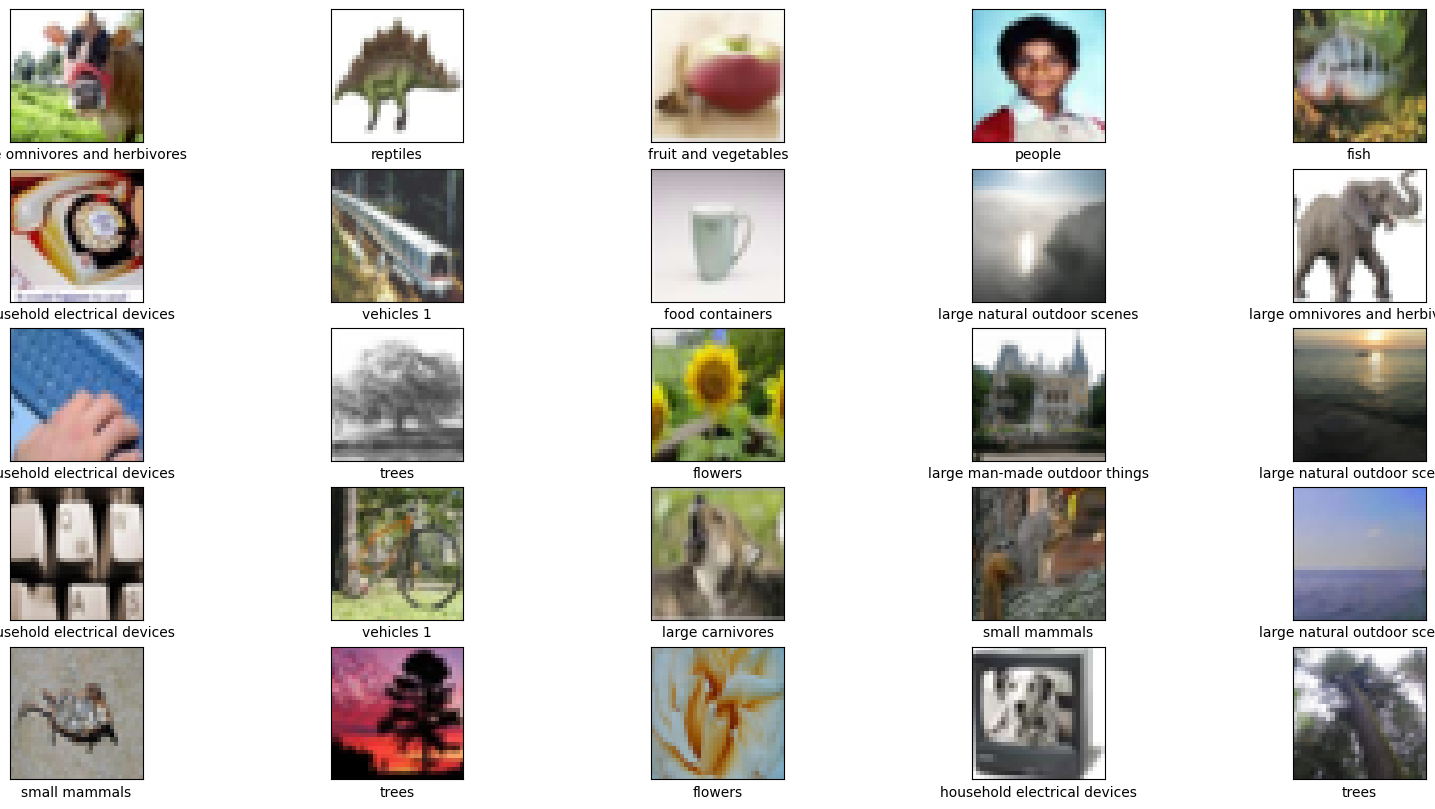

In [234]:
import matplotlib.pyplot as plt
class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices",
"household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes",
"large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals",
"trees","vehicles 1","vehicles 2"]
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

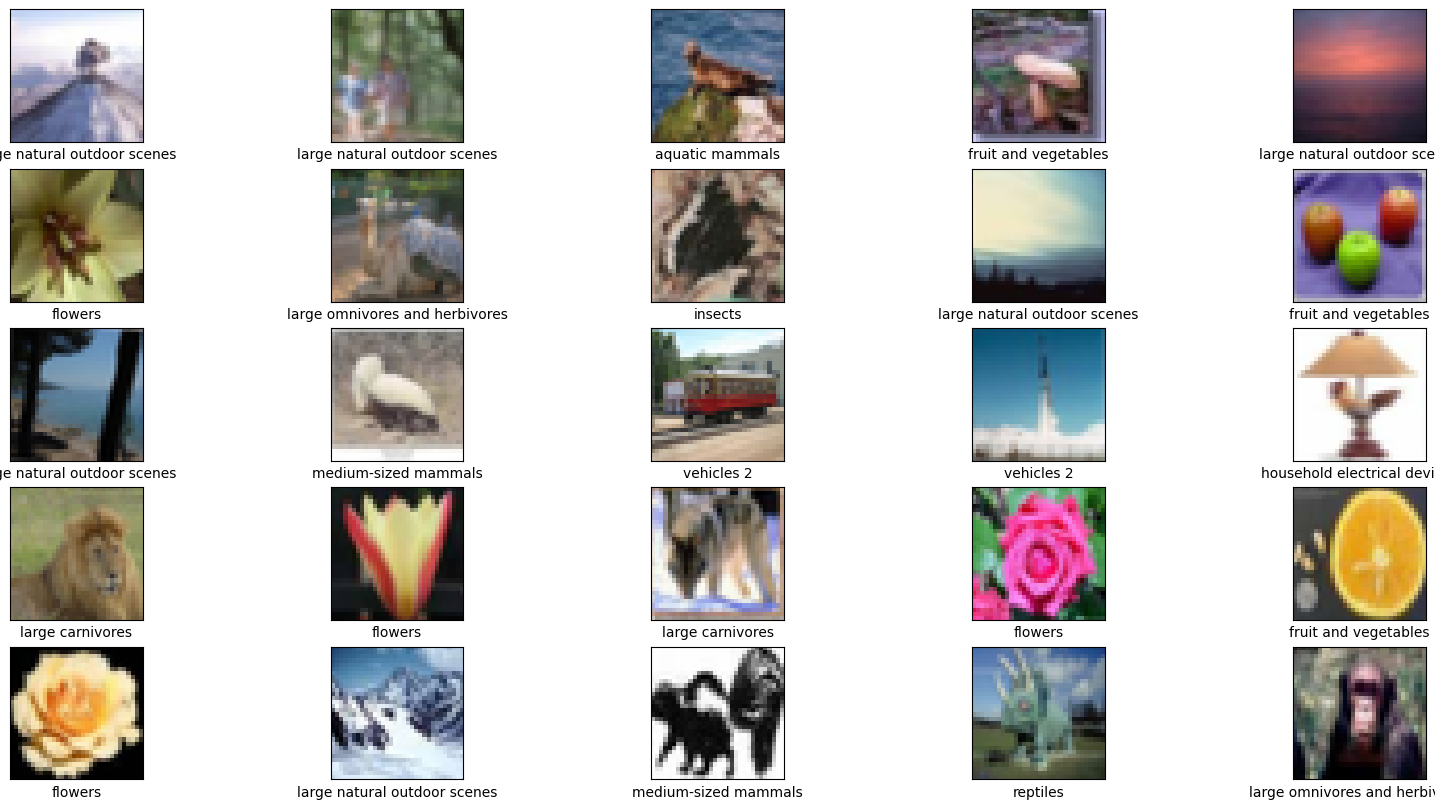

In [235]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[y_test[i][0]])
plt.show()

Import layers and models from tensorflow.keras and build a Sequential Model with Convulation layers at the base and Fully Connected Layers at the top.

We used the same model in the Example Notebook for MNIST and achieved only 41% accuracy on the test data.

We then used the following architecture to achieve 45% accuracy on the test data:

1. Conv Layer : 32 filters each of 3x3.
2. Conv Layer : 64 filters each of 3x3.
3. Max pool layer of 2x2 kernel size.
4. Conv Layer : 64 filters each of 2x2.
5. Conv Layer : 64 filters each of 2x2.
6. Max pool layer of 2x2 kernel size.
7. Flatten.
8. Dense of 80 neurons.
9. Dense of 50 neurons.
10. Dense of 20 neurons.

To train this, it required 40 minutes.

You should come up with your own architecture.

In [236]:
x_train,x_test=x_train/255,x_test/255
from tensorflow.keras import models,layers
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(128,(2,2),activation='relu'),
    layers.Conv2D(256,(2,2),activation='relu'),
    layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(20,activation='relu')
])
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 average_pooling2d (Average  (None, 14, 14, 64)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 128)       32896     
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 256)       131328    
                                                                 
 average_pooling2d_1 (Avera  (None, 6, 6, 256)         0         
 gePooling2D)                                        

In [237]:
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
metrics=['accuracy']
model.compile(loss=loss,optimizer=optimizer,metrics=metrics)

In [238]:
history=model.fit(x_train,y_train,batch_size=50,epochs=20,shuffle=True,verbose=2)
model.evaluate(x_test,y_test,batch_size=50,verbose=2)

Epoch 1/20
1000/1000 - 77s - loss: 2.7225 - accuracy: 0.1840 - 77s/epoch - 77ms/step
Epoch 2/20
1000/1000 - 82s - loss: 2.3818 - accuracy: 0.2954 - 82s/epoch - 82ms/step
Epoch 3/20
1000/1000 - 147s - loss: 2.1724 - accuracy: 0.3596 - 147s/epoch - 147ms/step
Epoch 4/20
1000/1000 - 182s - loss: 2.0123 - accuracy: 0.4090 - 182s/epoch - 182ms/step
Epoch 5/20
1000/1000 - 264s - loss: 1.8737 - accuracy: 0.4516 - 264s/epoch - 264ms/step
Epoch 6/20
1000/1000 - 160s - loss: 1.7556 - accuracy: 0.4883 - 160s/epoch - 160ms/step
Epoch 7/20
1000/1000 - 131s - loss: 1.6360 - accuracy: 0.5238 - 131s/epoch - 131ms/step
Epoch 8/20
1000/1000 - 408s - loss: 1.5326 - accuracy: 0.5574 - 408s/epoch - 408ms/step
Epoch 9/20
1000/1000 - 62s - loss: 1.4173 - accuracy: 0.5926 - 62s/epoch - 62ms/step
Epoch 10/20
1000/1000 - 164s - loss: 1.3116 - accuracy: 0.6254 - 164s/epoch - 164ms/step
Epoch 11/20
1000/1000 - 78s - loss: 1.2111 - accuracy: 0.6548 - 78s/epoch - 78ms/step
Epoch 12/20
1000/1000 - 117s - loss: 1.114

[2.757755756378174, 0.44929999113082886]

In [239]:
history.history

{'loss': [2.722480297088623,
  2.381837844848633,
  2.1723506450653076,
  2.012312412261963,
  1.8736613988876343,
  1.755634069442749,
  1.6359955072402954,
  1.5325762033462524,
  1.4172600507736206,
  1.311640977859497,
  1.2111397981643677,
  1.1144788265228271,
  1.0250754356384277,
  0.9406184554100037,
  0.866881251335144,
  0.8143990635871887,
  0.7659927606582642,
  0.723605215549469,
  0.7039165496826172,
  0.6659079790115356],
 'accuracy': [0.18400000035762787,
  0.2953599989414215,
  0.3595600128173828,
  0.4090000092983246,
  0.45155999064445496,
  0.48833999037742615,
  0.5237600207328796,
  0.5573800206184387,
  0.5925999879837036,
  0.6253799796104431,
  0.6547799706459045,
  0.6825799942016602,
  0.7119399905204773,
  0.7356799840927124,
  0.75764000415802,
  0.7703800201416016,
  0.7829999923706055,
  0.7955600023269653,
  0.798799991607666,
  0.8090000152587891]}

Plot the training accuracy vs number of epochs graph. Print the test accuracy.

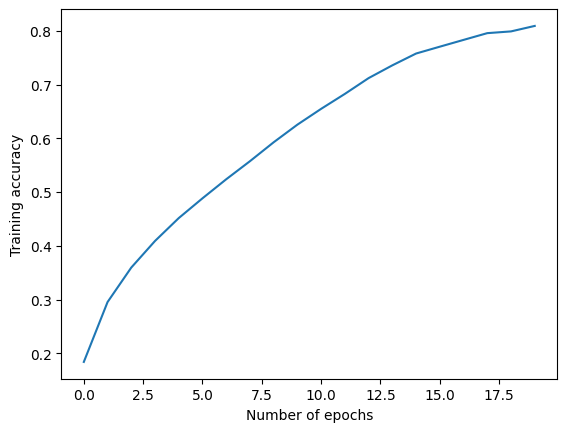

In [240]:
plt.plot(np.array(range(20)),history.history['accuracy'])
plt.xlabel("Number of epochs")
plt.ylabel("Training accuracy")
plt.show()

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models. The top models are of transformers. We can check the ResNet-18 model. It consists of 18 layers. The architecture could be in the internet. Use ChatGPT if necessary. Training it for 10 epochs will take approximately 1 hour.

The layers are :

1. Conv layer : 64 kernels, 7x7 . strides = (2,2). activation =none.
2. Batch Normalization.
3. Relu Activation.
4. MaxPooling 3x3 . stride =2x2.
5. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none.
6. Batch Normalization.
7. Relu Activation.
8. Same as 5 but 128 kernels.
9. Batch Normalization.
10. Relu Activation.
11. Same as 5 but 256 kernels.
12. Batch Normalization.
13. Relu Activation.
14. Same as 5 but 512 kernels.
15. Batch Normalization.
16. Relu Activation.
17. Global Average Pooling.
18. Dense layer of 20 neurons.





In [7]:
model1=models.Sequential([
    layers.Conv2D(64,(7,7),input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)),
    layers.Conv2D(64,(3,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(128,(3,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(256,(3,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(512,(3,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(20)
])
model1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        9472      
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 10, 10, 64)       

In [8]:
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
metrics=['accuracy']
model1.compile(loss=loss,optimizer=optimizer,metrics=metrics)

In [10]:
history=model1.fit(x_train,y_train,batch_size=50,epochs=20,shuffle=True,verbose=2)
model1.evaluate(x_test,y_test,batch_size=50,verbose=2)

Epoch 1/20
1000/1000 - 103s - loss: 1.9778 - accuracy: 0.3835 - 103s/epoch - 103ms/step
Epoch 2/20
1000/1000 - 136s - loss: 1.7759 - accuracy: 0.4455 - 136s/epoch - 136ms/step
Epoch 3/20
1000/1000 - 240s - loss: 1.6260 - accuracy: 0.4898 - 240s/epoch - 240ms/step
Epoch 4/20
1000/1000 - 150s - loss: 1.5037 - accuracy: 0.5282 - 150s/epoch - 150ms/step
Epoch 5/20
1000/1000 - 240s - loss: 1.3992 - accuracy: 0.5581 - 240s/epoch - 240ms/step
Epoch 6/20
1000/1000 - 162s - loss: 1.3072 - accuracy: 0.5839 - 162s/epoch - 162ms/step
Epoch 7/20
1000/1000 - 106s - loss: 1.2117 - accuracy: 0.6127 - 106s/epoch - 106ms/step
Epoch 8/20
1000/1000 - 332s - loss: 1.1256 - accuracy: 0.6388 - 332s/epoch - 332ms/step
Epoch 9/20
1000/1000 - 164s - loss: 1.0400 - accuracy: 0.6649 - 164s/epoch - 164ms/step
Epoch 10/20
1000/1000 - 225s - loss: 0.9583 - accuracy: 0.6912 - 225s/epoch - 225ms/step
Epoch 11/20
1000/1000 - 272s - loss: 0.8686 - accuracy: 0.7172 - 272s/epoch - 272ms/step
Epoch 12/20
1000/1000 - 100s -

[2.229440450668335, 0.5203999876976013]

# Question 2: Rising Fuel Prices
In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability.

In this question, we will be using the classic Auto MPG dataset and build a model to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, we will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

In [300]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load the data.

In [301]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


Get an overview of the data.

In [302]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 28.1 KB


Drop the null values and redundant columns. Or you may do imputation of null values, if you are familiar with that.

Search for dropping rows with null values in a Pandas dataframe.

In [303]:
from sklearn.impute import SimpleImputer
dataset.drop(columns=['Car Name'],inplace=True)
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
# Here it is converted to numpy array
dataset = imputer.fit_transform(dataset)
dataset=pd.DataFrame(dataset,columns=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin'])
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


##Handling Non-Numeric Data
The origin column contains "Label Encoded Values". More about it [here](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/).

We want to convert it into a [One-Hot-Encoded](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python//) value.

In [304]:
# Convert categorical 'Origin' column to one-hot encoded features : pd.get_dummies ...
dataset=pd.get_dummies(dataset,columns=['Origin'])
dataset


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1.0,Origin_2.0,Origin_3.0
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,True,False,False
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,True,False,False
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,True,False,False
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,True,False,False
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,True,False,False
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,False,True,False
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,True,False,False
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,True,False,False


In [305]:
# Separate the target variable from the features in the dataset.
x=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin_1.0','Origin_2.0','Origin_3.0']]
y=dataset[['MPG']]
print(x)
print(y)

     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
0          8.0         307.0       130.0  3504.0          12.0        70.0   
1          8.0         350.0       165.0  3693.0          11.5        70.0   
2          8.0         318.0       150.0  3436.0          11.0        70.0   
3          8.0         304.0       150.0  3433.0          12.0        70.0   
4          8.0         302.0       140.0  3449.0          10.5        70.0   
..         ...           ...         ...     ...           ...         ...   
393        4.0         140.0        86.0  2790.0          15.6        82.0   
394        4.0          97.0        52.0  2130.0          24.6        82.0   
395        4.0         135.0        84.0  2295.0          11.6        82.0   
396        4.0         120.0        79.0  2625.0          18.6        82.0   
397        4.0         119.0        82.0  2720.0          19.4        82.0   

     Origin_1.0  Origin_2.0  Origin_3.0  
0          True      

In [306]:
# Split the data into training and testing sets. Use sklearn.model_selection.train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(318, 9) (318, 1)
(80, 9) (80, 1)


In [307]:
print(x_train)
print(x_test)

     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
3          8.0         304.0       150.0  3433.0          12.0        70.0   
18         4.0          97.0        88.0  2130.0          14.5        70.0   
376        4.0          91.0        68.0  2025.0          18.2        82.0   
248        4.0          91.0        60.0  1800.0          16.4        78.0   
177        4.0         115.0        95.0  2694.0          15.0        75.0   
..         ...           ...         ...     ...           ...         ...   
71         3.0          70.0        97.0  2330.0          13.5        72.0   
106        8.0         350.0       180.0  4499.0          12.5        73.0   
270        4.0         134.0        95.0  2515.0          14.8        78.0   
348        4.0          89.0        62.0  2050.0          17.3        81.0   
102        4.0          97.0        46.0  1950.0          21.0        73.0   

     Origin_1.0  Origin_2.0  Origin_3.0  
3          True      

In [308]:
print(y_train)
print(y_test)

      MPG
3    16.0
18   27.0
376  37.0
248  36.1
177  23.0
..    ...
71   19.0
106  12.0
270  21.1
348  37.7
102  26.0

[318 rows x 1 columns]
      MPG
198  33.0
396  28.0
33   19.0
208  13.0
93   14.0
..    ...
249  19.9
225  17.5
367  28.0
175  29.0
285  17.0

[80 rows x 1 columns]


#Scaling the Data
It is evident that the features vary a lot by a quick statistical survey. To ensure that our model generalizes over a large variety of vehicles, we need to Normalize the data using the *scaler.fit_transform*.

In [310]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_columns=['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
x_train[numerical_columns]=scaler.fit_transform(x_train[numerical_columns])
x_test[numerical_columns]=scaler.transform(x_test[numerical_columns])
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Cylinders  Displacement  Horsepower    Weight  Acceleration  Model Year  \
3     1.527188      1.090196    1.261834  0.552826     -1.319334   -1.696667   
18   -0.850515     -0.922996   -0.413513 -0.999667     -0.413182   -1.696667   
376  -0.850515     -0.981350   -0.953948 -1.124772      0.927922    1.638975   
248  -0.850515     -0.981350   -1.170121 -1.392854      0.275493    0.527094   
177  -0.850515     -0.747936   -0.224361 -0.327675     -0.231952   -0.306816   
..         ...           ...         ...       ...           ...         ...   
71   -1.444941     -1.185587   -0.170317 -0.761372     -0.775643   -1.140727   
106   1.527188      1.537573    2.072486  1.822940     -1.138103   -0.862757   
270  -0.850515     -0.563150   -0.224361 -0.540949     -0.304444    0.527094   
348  -0.850515     -1.000801   -1.116078 -1.094985      0.601707    1.361005   
102  -0.850515     -0.922996   -1.548426 -1.214133      1.942811   -0.862757   

     Origin_1.0  Origin_2.0  Origin_3.0

In [311]:
x_train=np.array(x_train).astype(float)
x_test=np.array(x_test).astype(float)
y_train=np.array(y_train).astype(float)
y_test=np.array(y_test).astype(float)

# Building the Model

Build a Fully Connected Neural Network with 3-4 Dense layers. You may decide the number of neuron in each layers.

Fit the model on the train data and evaluate the predictions on test data.

Use Adam optimizer and MeanSquaredError cost function. The lower the error, the better the model. Try to get MSE < 6 on the test data.

In [312]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation='linear',input_shape=(x_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation='linear'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16,activation='linear'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation='linear')
])

loss=tf.keras.losses.MeanSquaredError()
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=loss,optimizer=optimizer)
history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
10/10 [==============================] - 1s 7ms/step - loss: 1.5817
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.2643
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1085
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9290
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8641
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9647
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7918
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7597
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6687
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8268
Epoch 11/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7869
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6957
Epoch 13/100
10/10 [=================

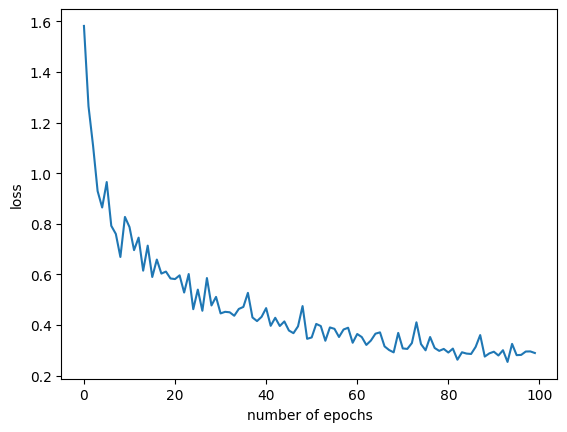

In [313]:
#Plot the Loss from the history..

plt.plot(np.array(range(100)),history.history['loss'])
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.show()

In [314]:
# Evaluate the model on the test set
model.evaluate(x_test,y_test,batch_size=32,verbose=1)

3/3 [==============================] - 0s 2ms/step - loss: 0.1394


0.13943825662136078